In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ifsp-d3apl-2023-face-recognition/sample_submission.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/train.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/test.csv
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0664.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1269.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0733.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0106.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0375.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1075.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0285.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0591.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0799.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1411.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/0074.jpg
/kaggle/input/ifsp-d3apl-2023-face-recognition/test/test/1031.jpg
/kaggle/input/ifsp-d3apl-2

# **1. Dataset**

# 1.1 Profiling

In [10]:
ls ../input/ifsp-d3apl-2023-face-recognition/train/train/

'Adam Sandler'/       'Faith Hill'/            'Meg Ryan'/
'Alec Baldwin'/       'George Clooney'/        'Meryl Streep'/
'Angelina Jolie'/     'Gordon Brown'/          'Michael Bloomberg'/
'Anna Kournikova'/    'Gwyneth Paltrow'/       'Mickey Rourke'/
'Ashton Kutcher'/     'Halle Berry'/           'Miley Cyrus'/
'Avril Lavigne'/      'Harrison Ford'/         'Morgan Freeman'/
'Barack Obama'/       'Hugh Jackman'/          'Nicole Kidman'/
'Ben Affleck'/        'Hugh Laurie'/           'Nicole Richie'/
'Beyonce Knowles'/    'Jack Nicholson'/        'Orlando Bloom'/
'Brad Pitt'/          'Jennifer Aniston'/      'Reese Witherspoon'/
'Cameron Diaz'/       'Jennifer Lopez'/        'Renee Zellweger'/
'Cate Blanchett'/     'Jennifer Love Hewitt'/  'Ricky Martin'/
'Charlize Theron'/    'Jessica Alba'/          'Robert Gates'/
'Christina Ricci'/    'Jessica Simpson'/       'Sania Mirza'/
'Claudia Schiffer'/   'Joaquin Phoenix'/       'Scarlett Johansson'/
'Clive Owen'/         'John Travolta

In [12]:
import os

dataset_folder = '../input/ifsp-d3apl-2023-face-recognition/train/train/'

class_folders = sorted(os.listdir(dataset_folder))


print(class_folders)
print(f'Number of class: {len(class_folders)}')

['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon', 'Meg Ryan', 'Meryl Streep', '

In [13]:
# show me the class proportions: number of samples per class
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    
    class_img_filenames = os.listdir(full_class_folder)
    print(f'Number of Images for Class "{class_folder}": {len(class_img_filenames)}')

Number of Images for Class "Adam Sandler": 88
Number of Images for Class "Alec Baldwin": 83
Number of Images for Class "Angelina Jolie": 194
Number of Images for Class "Anna Kournikova": 151
Number of Images for Class "Ashton Kutcher": 81
Number of Images for Class "Avril Lavigne": 279
Number of Images for Class "Barack Obama": 249
Number of Images for Class "Ben Affleck": 97
Number of Images for Class "Beyonce Knowles": 106
Number of Images for Class "Brad Pitt": 280
Number of Images for Class "Cameron Diaz": 226
Number of Images for Class "Cate Blanchett": 140
Number of Images for Class "Charlize Theron": 175
Number of Images for Class "Christina Ricci": 123
Number of Images for Class "Claudia Schiffer": 102
Number of Images for Class "Clive Owen": 114
Number of Images for Class "Colin Farrell": 125
Number of Images for Class "Colin Powell": 92
Number of Images for Class "Cristiano Ronaldo": 148
Number of Images for Class "Daniel Craig": 148
Number of Images for Class "Daniel Radclif

In [14]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)

# Print the sorted file counts
#for class_folder, count in sorted_counts:
#    print(f"{class_folder}: {count} files")


[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

# 1.2 Duplicate the training data folder for oversampling

In [16]:
import shutil
# Set the paths for the input and output directories
input_dir = dataset_folder
data_dir = '../working/oversampled'

# Duplicate the entire folder
shutil.copytree(input_dir, data_dir)


'../working/oversampled'

In [17]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

class_folders = sorted(os.listdir(data_dir))

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(data_dir, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)


[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

In [18]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image 
import PIL 

# Set the desired number of samples per class
desired_samples = 350

# Create an instance of the ImageDataGenerator
data_generator = ImageDataGenerator(
    #rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    #width_shift_range=0.1,  # Randomly shift the width of images by 10%
    #height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,  # Apply random shear transformations
    zoom_range=0.2,  # Apply random zoom transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels after rotation or shifting
)

# Iterate through the folders representing each class
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    
    if os.path.isdir(class_folder_path):
        # Get the list of images in the current class folder
        images = os.listdir(class_folder_path)
        
        # Calculate the number of existing samples in the class
        existing_samples = len(images)
        
        if existing_samples < desired_samples:
            # Calculate the number of additional samples needed
            additional_samples = desired_samples - existing_samples
            
            # Randomly select images from the existing samples
            #selected_images = random.sample(images, additional_samples)
            
            # Create a data generator for the current class folder
            generator = data_generator.flow_from_directory(
                directory=data_dir,
                target_size=(100, 100),  # Adjust the target size as per your requirements
                batch_size=1,
                class_mode='categorical',
                classes=[class_folder],
                shuffle=True,
                save_to_dir=class_folder_path, 
                save_prefix='aug-',
                save_format='jpg'
            )
            
            # Generate additional samples using the data generator
            for i in range(additional_samples):
                batch = next(generator)
                imagem = batch[0]
                


Found 137 images belonging to 1 classes.
Found 81 images belonging to 1 classes.
Found 114 images belonging to 1 classes.
Found 123 images belonging to 1 classes.
Found 90 images belonging to 1 classes.
Found 226 images belonging to 1 classes.
Found 133 images belonging to 1 classes.
Found 126 images belonging to 1 classes.
Found 110 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 88 images belonging to 1 classes.
Found 83 images belonging to 1 classes.
Found 280 images belonging to 1 classes.
Found 151 images belonging to 1 classes.
Found 180 images belonging to 1 classes.
Found 88 images belonging to 1 classes.
Found 130 images belonging to 1 classes.
Found 92 images belonging to 1 classes.
Found 114 images belonging to 1 classes.
Found 88 images belonging to 1 classes.
Found 88 images belonging to 1 classes.
Found 115 images belonging to 1 classes.
Found 190 images belonging to 1 classes.
Found 82 images belonging to 1 classes.
Found 186 images belongin

In [20]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

class_folders = sorted(os.listdir(data_dir))

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(data_dir, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)

[('Adam Sandler', 350), ('Alec Baldwin', 350), ('Angelina Jolie', 350), ('Anna Kournikova', 350), ('Ashton Kutcher', 350), ('Avril Lavigne', 350), ('Barack Obama', 350), ('Ben Affleck', 350), ('Beyonce Knowles', 350), ('Brad Pitt', 350), ('Cameron Diaz', 350), ('Cate Blanchett', 350), ('Charlize Theron', 350), ('Christina Ricci', 350), ('Claudia Schiffer', 350), ('Clive Owen', 350), ('Colin Farrell', 350), ('Colin Powell', 350), ('Cristiano Ronaldo', 350), ('Daniel Craig', 350), ('Daniel Radcliffe', 350), ('David Beckham', 350), ('David Duchovny', 350), ('Denise Richards', 350), ('Drew Barrymore', 350), ('Dustin Hoffman', 350), ('Ehud Olmert', 350), ('Eva Mendes', 350), ('Faith Hill', 350), ('George Clooney', 350), ('Gordon Brown', 350), ('Gwyneth Paltrow', 350), ('Halle Berry', 350), ('Harrison Ford', 350), ('Hugh Jackman', 350), ('Hugh Laurie', 350), ('Jack Nicholson', 350), ('Jennifer Aniston', 350), ('Jennifer Lopez', 350), ('Jennifer Love Hewitt', 350), ('Jessica Alba', 350), ('Je

# 1.3 Preprocessing the dataset

In [21]:
max_n_samples_per_class = 300

In [22]:
import random
import os

data_dir = '../working/oversampled'
dataset_folder = data_dir
class_folders = sorted(os.listdir(dataset_folder))

# OPTIONAL: just to get the same selected images
random.seed(42)

img_full_paths = []
img_classes = []

for class_folder in class_folders:
    img_class = class_folder  # english
    print(f'Class: {img_class}')  # italiano
    
    # translated class
    #img_class = translate[class_folder]  # english
    #print(f'Translation: {img_class}')  # italiano
    
    # get the full class folder pathname
    full_class_folder = os.path.join(dataset_folder, class_folder)
    print(full_class_folder)
    
    # get all image filenames (without their parent dir) for the current class/animal
    class_img_filenames = sorted(os.listdir(full_class_folder))
    print(len(class_img_filenames))
    
    #### undersampling from scratch
    ### one possible strategy to select `max_n_samples_per_class` of samples randomly
    # random.shuffle(class_img_filenames)
    # class_img_filenames = class_img_filenames[:max_n_samples_per_class]

    class_img_filenames = random.sample(class_img_filenames, max_n_samples_per_class)
    print(f'Number of images: {len(class_img_filenames)}')
    
    for img_filename in class_img_filenames:
        full_img_path = os.path.join(full_class_folder, img_filename)
        
        img_full_paths.append(full_img_path)
        img_classes.append(img_class)
    
    print()

Class: Adam Sandler
../working/oversampled/Adam Sandler
350
Number of images: 300

Class: Alec Baldwin
../working/oversampled/Alec Baldwin
350
Number of images: 300

Class: Angelina Jolie
../working/oversampled/Angelina Jolie
350
Number of images: 300

Class: Anna Kournikova
../working/oversampled/Anna Kournikova
350
Number of images: 300

Class: Ashton Kutcher
../working/oversampled/Ashton Kutcher
350
Number of images: 300

Class: Avril Lavigne
../working/oversampled/Avril Lavigne
350
Number of images: 300

Class: Barack Obama
../working/oversampled/Barack Obama
350
Number of images: 300

Class: Ben Affleck
../working/oversampled/Ben Affleck
350
Number of images: 300

Class: Beyonce Knowles
../working/oversampled/Beyonce Knowles
350
Number of images: 300

Class: Brad Pitt
../working/oversampled/Brad Pitt
350
Number of images: 300

Class: Cameron Diaz
../working/oversampled/Cameron Diaz
350
Number of images: 300

Class: Cate Blanchett
../working/oversampled/Cate Blanchett
350
Number of

In [23]:
print(len(img_full_paths))

24900


In [24]:
print(len(img_classes))

24900


In [25]:
# creating a dataframe to store the image full pathnames and their corresponding classes
import pandas as pd

dataset_df = pd.DataFrame({
    'image_pathname': img_full_paths,
    'class': img_classes
})

dataset_df

,image_pathname,class
0,../working/oversampled/Adam Sandler/aug-_82_49...,Adam Sandler
1,../working/oversampled/Adam Sandler/303.jpg,Adam Sandler
2,../working/oversampled/Adam Sandler/152.jpg,Adam Sandler
3,../working/oversampled/Adam Sandler/aug-_25_49...,Adam Sandler
4,../working/oversampled/Adam Sandler/aug-_20_33...,Adam Sandler
...,...,...
24895,../working/oversampled/Zac Efron/aug-_41_16018...,Zac Efron
24896,../working/oversampled/Zac Efron/240.jpg,Zac Efron
24897,../working/oversampled/Zac Efron/235.jpg,Zac Efron
24898,../working/oversampled/Zac Efron/aug-_93_24451...,Zac Efron


In [26]:
dataset_df['class'].value_counts()

Adam Sandler         300
Nicole Kidman        300
Miley Cyrus          300
Mickey Rourke        300
Michael Bloomberg    300
                    ... 
Ehud Olmert          300
Dustin Hoffman       300
Drew Barrymore       300
Denise Richards      300
Zac Efron            300
Name: class, Length: 83, dtype: int64

# 1.4 Saving the preprocessed dataset

In [27]:
dataset_df.to_csv('../working/faces_dataset_oversampled.csv', index=False)

# 1.5 Inspecting an image

In [28]:
import cv2

In [29]:
dataset_df.loc[0, 'image_pathname']

'../working/oversampled/Adam Sandler/aug-_82_4911747.jpg'

In [30]:
# read an image
img = cv2.imread(dataset_df.loc[0, 'image_pathname'])
print(type(img))
img.shape

<class 'numpy.ndarray'>


(100, 100, 3)

In [31]:
# channel BLUE
img[:, :, 0]

array([[  4,   4,   4, ...,   2,   7,   9],
       [ 12,   7,   5, ...,   8,   4,   0],
       [ 11,   9,  12, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 179, 177,   0],
       [  0,   0,   1, ..., 197, 202,   0],
       [  0,   0,   0, ..., 175, 193,  14]], dtype=uint8)

In [32]:
# channel GREEN
img[:, :, 1]

array([[  1,   1,   1, ...,   0,   2,   4],
       [  7,   3,   0, ...,   7,   3,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  1,   1,   2, ..., 218, 209,  14],
       [  1,   1,   2, ..., 236, 234,  25],
       [  0,   0,   1, ..., 214, 225,  43]], dtype=uint8)

In [33]:
# channel RED
img[:, :, 2]

array([[  0,   0,   0, ...,   6,  11,  13],
       [  4,   0,   0, ...,  17,  13,   8],
       [  0,   0,   2, ...,  13,  13,  13],
       ...,
       [  4,   2,   0, ..., 240, 232,  35],
       [  4,   2,   0, ..., 255, 255,  46],
       [  3,   1,   0, ..., 236, 248,  64]], dtype=uint8)

In [34]:
img.min(), img.max()

(0, 255)

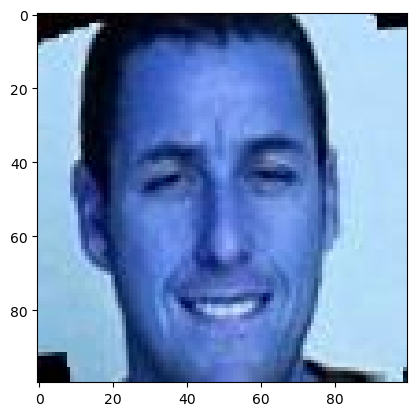

In [35]:
import matplotlib.pyplot as plt

plt.imshow(img)

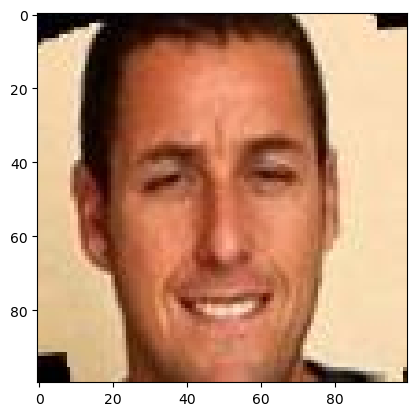

In [36]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_RGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_RGB)

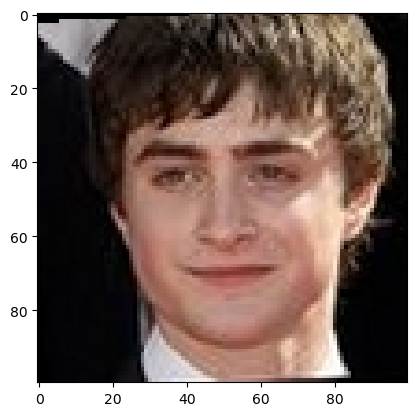

In [37]:
img = cv2.imread(dataset_df.loc[6000, 'image_pathname'])  # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img)

In [38]:
img.shape

(100, 100, 3)

# 1.6 Create the training dataset

In [39]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [40]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [41]:
dataset_df

,image_pathname,class
0,../working/oversampled/Adam Sandler/aug-_82_49...,Adam Sandler
1,../working/oversampled/Adam Sandler/303.jpg,Adam Sandler
2,../working/oversampled/Adam Sandler/152.jpg,Adam Sandler
3,../working/oversampled/Adam Sandler/aug-_25_49...,Adam Sandler
4,../working/oversampled/Adam Sandler/aug-_20_33...,Adam Sandler
...,...,...
24895,../working/oversampled/Zac Efron/aug-_41_16018...,Zac Efron
24896,../working/oversampled/Zac Efron/240.jpg,Zac Efron
24897,../working/oversampled/Zac Efron/235.jpg,Zac Efron
24898,../working/oversampled/Zac Efron/aug-_93_24451...,Zac Efron


In [42]:
dataset_df["class"].unique()

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [43]:
class_names = sorted(dataset_df["class"].unique())
n_classes = len(class_names)

print(f'Number of classes: {n_classes}')
print(f'Classes: {class_names}')

Number of classes: 83
Classes: ['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon'

In [44]:
# number of samples per class
dataset_df['class'].value_counts()

Adam Sandler         300
Nicole Kidman        300
Miley Cyrus          300
Mickey Rourke        300
Michael Bloomberg    300
                    ... 
Ehud Olmert          300
Dustin Hoffman       300
Drew Barrymore       300
Denise Richards      300
Zac Efron            300
Name: class, Length: 83, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

# for a stratified sampling, we need to pass the labels
labels = dataset_df['class']

dataset_df_full_train, dataset_df_test = train_test_split(dataset_df, test_size=0.2, random_state=42, stratify=labels)

In [46]:
dataset_df_full_train.shape

(19920, 2)

In [47]:
dataset_df_full_train.head()

,image_pathname,class
2202,../working/oversampled/Ben Affleck/241.jpg,Ben Affleck
10884,../working/oversampled/Jack Nicholson/26.jpg,Jack Nicholson
5713,../working/oversampled/Daniel Craig/aug-_124_8...,Daniel Craig
4480,../working/oversampled/Claudia Schiffer/aug-_4...,Claudia Schiffer
24686,../working/oversampled/Zac Efron/aug-_29_55152...,Zac Efron


In [48]:
dataset_df_test.shape

(4980, 2)

In [49]:
# for a stratified sampling, we need to pass the labels
labels_full_train = dataset_df_full_train['class']

dataset_df_train, dataset_df_val = train_test_split(dataset_df_full_train, train_size=0.8, random_state=42, stratify=labels_full_train)

dataset_df_train['class'].value_counts()

Jennifer Aniston     192
John Travolta        192
Harrison Ford        192
Daniel Craig         192
Reese Witherspoon    192
                    ... 
Kate Moss            192
Anna Kournikova      192
Katherine Heigl      192
Alec Baldwin         192
Avril Lavigne        192
Name: class, Length: 83, dtype: int64

In [50]:
# checking class balancing in the validation set
dataset_df_val['class'].value_counts()

Kiefer Sutherland    48
Meg Ryan             48
Cameron Diaz         48
Jennifer Lopez       48
David Beckham        48
                     ..
Shakira              48
Zac Efron            48
Leonardo DiCaprio    48
Julia Roberts        48
George Clooney       48
Name: class, Length: 83, dtype: int64

In [51]:
# checking class balancing in the training set
dataset_df_test['class'].value_counts()

Will Smith          60
Ashton Kutcher      60
Hugh Jackman        60
Jennifer Aniston    60
Nicole Richie       60
                    ..
Meg Ryan            60
Hugh Laurie         60
Jack Nicholson      60
Gwyneth Paltrow     60
Martha Stewart      60
Name: class, Length: 83, dtype: int64

# 1.7 Preprocessing the images

In [54]:
dataset_df.loc[0, 'image_pathname']

'../working/oversampled/Adam Sandler/aug-_82_4911747.jpg'

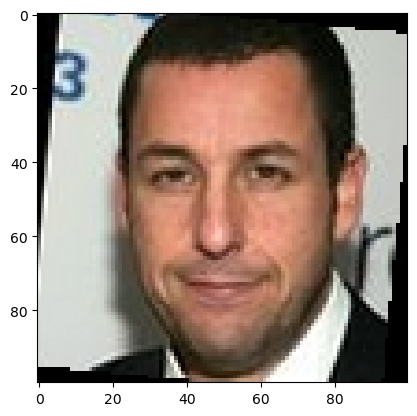

In [55]:
import cv2
import matplotlib.pyplot as plt

# BGR
img = cv2.imread('../working/oversampled/Adam Sandler/73.jpg')
# BGR ==> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [56]:
# aspect ratio = width / height
aspect_ratio = img.shape[0] / img.shape[1]
aspect_ratio

1.0

In [57]:
import numpy as np

# preprocess the image dataset and return the feature matrix and the label array: X, y
def preprocess_faces_dataset(dataset_df, label_encoder, verbose=1000):
#def preprocess_faces_dataset(dataset_df, label_encoder, new_img_dims=(100,100), verbose=1000):
    image_list = []  # list of preprocessed images (numpy arrays)
    
    for index, img_path in enumerate(dataset_df['image_pathname']):
        img = cv2.imread(img_path)  # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB
        
        # image resizing 
        # for gray or color images, the linear interpolation sounds good
        #img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)
        image_list.append(img)
        
        # verbose - print every 1000 iterations
        if index % verbose == 0:
            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')
    
    # feature matrix
    # shape = (n_imgs, width, height, n_channels)
    X = np.array(image_list)
    
    # feature scaling
    X = X / 255.0
    
    # encoding the classes
    y = label_encoder.transform(dataset_df['class'])
    
    return X, y

In [58]:
# training a Label Encoder from the train set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(dataset_df_train['class'])

label_encoder.classes_

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [59]:
# transform/map the string class to the trained numeric class
label_encoder.transform(['Alec Baldwin', 'Claudia Schiffer', 'Zac Efron'])

array([ 1, 14, 82])

In [60]:
# preprocessing the train set
X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder)
#X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder, new_img_dims=(100, 100))

1/15936 - ../working/oversampled/Jennifer Aniston/aug-_140_949204.jpg
1001/15936 - ../working/oversampled/Denise Richards/374.jpg
2001/15936 - ../working/oversampled/David Duchovny/aug-_120_9703731.jpg
3001/15936 - ../working/oversampled/Jessica Alba/130.jpg
4001/15936 - ../working/oversampled/Michael Bloomberg/aug-_55_5253420.jpg
5001/15936 - ../working/oversampled/Alec Baldwin/aug-_78_3890462.jpg
6001/15936 - ../working/oversampled/Claudia Schiffer/109.jpg
7001/15936 - ../working/oversampled/David Beckham/aug-_125_4667969.jpg
8001/15936 - ../working/oversampled/Hugh Laurie/aug-_145_4832395.jpg
9001/15936 - ../working/oversampled/Adam Sandler/aug-_77_3636416.jpg
10001/15936 - ../working/oversampled/Daniel Radcliffe/28.jpg
11001/15936 - ../working/oversampled/Gwyneth Paltrow/100.jpg
12001/15936 - ../working/oversampled/George Clooney/202.jpg
13001/15936 - ../working/oversampled/Morgan Freeman/aug-_11_6742543.jpg
14001/15936 - ../working/oversampled/Leonardo DiCaprio/aug-_94_186818.jpg


In [61]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train (classes): {np.unique(y_train)}')
print(f'y_train.shape: {y_train.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

X_train.shape: (15936, 100, 100, 3)
y_train (classes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
y_train.shape: (15936,)
Min. value of X_train: 0.0
Max. value of X_train: 1.0



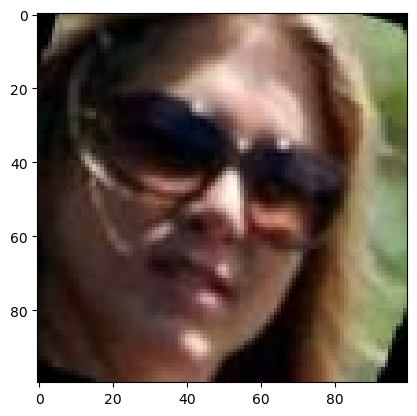

In [62]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [63]:

# preprocessing the validation set
X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder)
#X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder, new_img_dims=(100, 100))

1/3984 - ../working/oversampled/Kiefer Sutherland/aug-_75_6691191.jpg
1001/3984 - ../working/oversampled/Ashton Kutcher/213.jpg
2001/3984 - ../working/oversampled/Daniel Radcliffe/aug-_51_1629332.jpg
3001/3984 - ../working/oversampled/Faith Hill/aug-_24_9268564.jpg


In [64]:
print(f'X_val.shape: {X_val.shape}')
print(f'y_val (classes): {np.unique(y_val)}')
print(f'y_val.shape: {y_val.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_val: {X_val.min()}')
print(f'Max. value of X_val: {X_val.max()}\n')

X_val.shape: (3984, 100, 100, 3)
y_val (classes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
y_val.shape: (3984,)
Min. value of X_val: 0.0
Max. value of X_val: 1.0



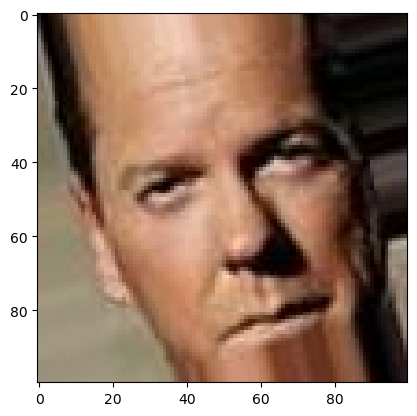

In [65]:
import matplotlib.pyplot as plt
plt.imshow(X_val[0])

In [66]:
# preprocessing the test set
X_test, y_test = preprocess_faces_dataset(dataset_df_test, label_encoder)

1/4980 - ../working/oversampled/Will Smith/90.jpg
1001/4980 - ../working/oversampled/Uma Thurman/aug-_23_3806033.jpg
2001/4980 - ../working/oversampled/Jennifer Lopez/aug-_79_7978568.jpg
3001/4980 - ../working/oversampled/Jessica Simpson/462.jpg
4001/4980 - ../working/oversampled/John Travolta/aug-_55_7841869.jpg


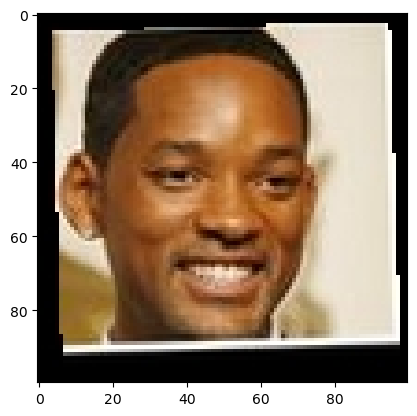

In [67]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

# 1.8 Saving the preprocessed data

In [68]:
import os

out_dir = '../working/preprocessed'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
dataset_df_full_train.to_csv(os.path.join(out_dir, 'full_train.csv'), index=False)

dataset_df_train.to_csv(os.path.join(out_dir, 'train.csv'), index=False)
np.save(os.path.join(out_dir, 'train_data_64x64x3.npy'), X_train)
np.save(os.path.join(out_dir, 'train_labels.npy'), y_train)

dataset_df_val.to_csv(os.path.join(out_dir, 'validation.csv'), index=False)
np.save(os.path.join(out_dir, 'validation_data_64x64x3.npy'), X_val)
np.save(os.path.join(out_dir, 'validation_labels.npy'), y_val)

dataset_df_test.to_csv(os.path.join(out_dir, 'test.csv'), index=False)
np.save(os.path.join(out_dir, 'test_data_64x64x3.npy'), X_test)
np.save(os.path.join(out_dir, 'test_labels.npy'), y_test)

# 2 Training the model

# 2.1 Stablish base model for transfer learning VGG16

In [69]:
# https://keras.io/api/applications/vgg/
# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=None,   # we will ignore the top layers that consists of the MLP classifier of VGG16
                   weights="imagenet", # we will use the weights learned for the ImageNet dataset
                   input_shape=(100, 100, 3))  # let's consider a smaller resolution than the original paper due to lack of memory


# freeze the base model weights ==> these weights won't be updated during training
# i.e., the weights of all layers from the base model are not updated
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [70]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

# 2.2 Define the connected model

In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


model = Sequential([
    # our base model - feature extraction
    base_model,
    
    Flatten(),
    
    # FC classifier
    Dense(256, activation='relu'),
  #  Dense(128, activation='relu'),
  #  Dense(64, activation='relu'),
    
    Dense(83, activation='softmax')
])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dense_1 (Dense)             (None, 83)                21331     
                                                                 
Total params: 15,915,923
Trainable params: 1,201,235
Non-trainable params: 14,714,688
_________________________________________________________________


# 2.3 Compile and run the model

In [73]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [74]:
import tensorflow
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [75]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/100
498/498 [==============================] - 24s 32ms/step - loss: 3.5866 - accuracy: 0.1424 - val_loss: 2.9936 - val_accuracy: 0.2465
Epoch 2/100
498/498 [==============================] - 12s 24ms/step - loss: 2.6228 - accuracy: 0.3333 - val_loss: 2.5809 - val_accuracy: 0.3331
Epoch 3/100
498/498 [==============================] - 11s 23ms/step - loss: 2.1588 - accuracy: 0.4386 - val_loss: 2.4503 - val_accuracy: 0.3619
Epoch 4/100
498/498 [==============================] - 11s 23ms/step - loss: 1.8383 - accuracy: 0.5201 - val_loss: 2.2979 - val_accuracy: 0.4006
Epoch 5/100
498/498 [==============================] - 11s 23ms/step - loss: 1.5905 - accuracy: 0.5835 - val_loss: 2.1845 - val_accuracy: 0.4277
Epoch 6/100
498/498 [==============================] - 11s 23ms/step - loss: 1.3854 - accuracy: 0.6340 - val_loss: 2.0922 - val_accuracy: 0.4551
Epoch 7/100
498/498 [==============================] - 12s 23ms/step - loss: 1.2122 - accuracy: 0.6812 - val_loss: 2.0798 - val_ac

# 2.4 Visualizing the training history

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

Text(0, 0.5, 'Score')

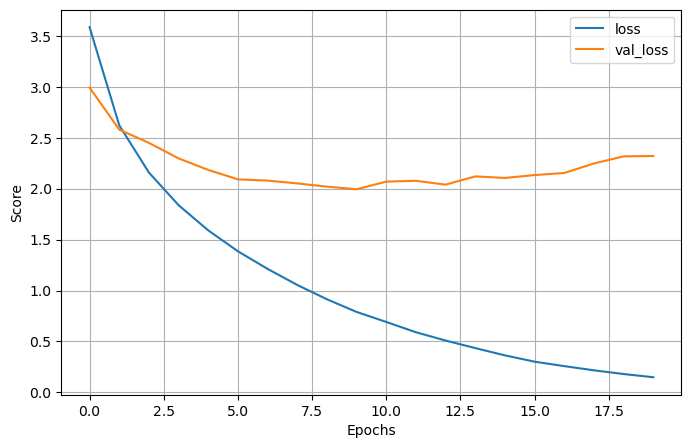

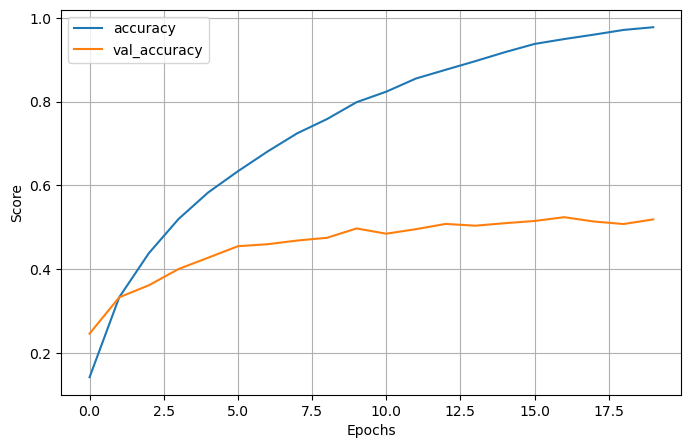

In [79]:
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

history_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

In [80]:

model.evaluate(X_test, y_test)

156/156 [==============================] - 3s 21ms/step - loss: 1.9979 - accuracy: 0.4996


[1.9978643655776978, 0.4995983839035034]

In [81]:
y_test_proba = model.predict(X_test)
y_test_proba

156/156 [==============================] - 3s 17ms/step


array([[6.39539666e-09, 5.09988482e-13, 1.45119728e-07, ...,
        3.23911053e-07, 9.98675048e-01, 2.53757069e-08],
       [1.70737575e-08, 2.62521627e-09, 4.04289141e-02, ...,
        7.35574940e-06, 2.03793693e-09, 4.89896183e-06],
       [7.15056292e-10, 4.02445778e-07, 1.64158898e-03, ...,
        2.19999174e-06, 1.33580924e-09, 8.47261913e-11],
       ...,
       [6.83694452e-05, 3.63813847e-01, 3.08362502e-07, ...,
        6.65034440e-06, 6.03237327e-09, 4.40813834e-03],
       [1.00504025e-07, 1.28826403e-11, 7.30586365e-08, ...,
        3.46475559e-09, 1.65140211e-11, 3.39031158e-06],
       [3.15200923e-05, 7.26527418e-04, 9.16900026e-05, ...,
        5.46183173e-06, 2.09151082e-07, 3.36475950e-03]], dtype=float32)

In [82]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred

array([81, 32, 72, ...,  1, 13, 62])

In [83]:
from sklearn.metrics import classification_report

class_names = label_encoder.classes_

print(classification_report(y_test, y_test_pred, target_names=[name for name in class_names]))

                      precision    recall  f1-score   support

        Adam Sandler       0.80      0.47      0.59        60
        Alec Baldwin       0.76      0.52      0.61        60
      Angelina Jolie       0.43      0.50      0.47        60
     Anna Kournikova       0.40      0.42      0.41        60
      Ashton Kutcher       0.70      0.58      0.64        60
       Avril Lavigne       0.74      0.62      0.67        60
        Barack Obama       0.61      0.77      0.68        60
         Ben Affleck       0.52      0.53      0.52        60
     Beyonce Knowles       0.47      0.45      0.46        60
           Brad Pitt       0.39      0.23      0.29        60
        Cameron Diaz       0.58      0.30      0.40        60
      Cate Blanchett       0.37      0.18      0.24        60
     Charlize Theron       0.41      0.28      0.34        60
     Christina Ricci       0.36      0.63      0.46        60
    Claudia Schiffer       0.63      0.63      0.63        60
       

In [85]:
y_test_class_name = label_encoder.inverse_transform(y_test)
y_test_pred_class_name = label_encoder.inverse_transform(y_test_pred)

In [87]:
misclassification_mask = y_test_class_name != y_test_pred_class_name

In [88]:
sheep_error_mask = misclassification_mask & (y_test_class_name == "Alec Baldwin")

np.argwhere(sheep_error_mask)[:3]

array([[  20],
       [ 957],
       [1353]])

Text(0.5, 1.0, 'True: Anna Kournikova, Predicted: Anna Kournikova')

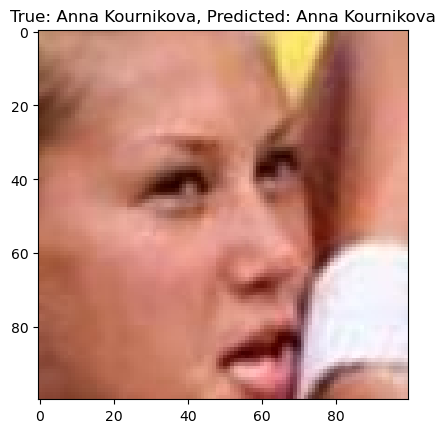

In [89]:
img_idx = 18

plt.imshow(X_test[img_idx])
plt.title(f'True: {y_test_class_name[img_idx]}, Predicted: {y_test_pred_class_name[img_idx]}')